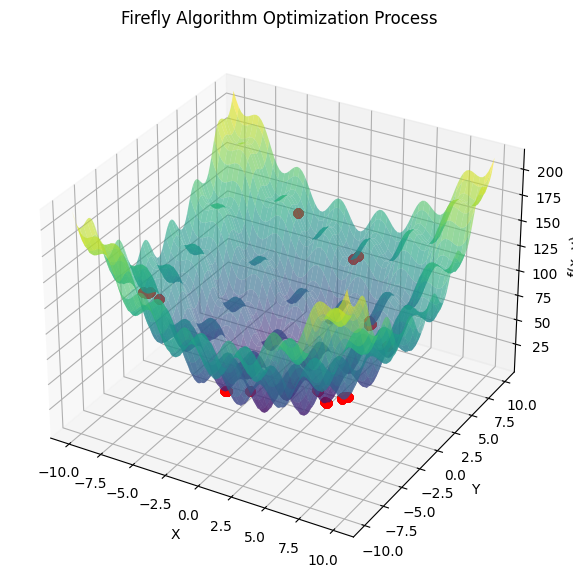

Best Solution: [3.02203525e+00 2.81058927e-03], Objective: 9.488552350069696


In [2]:
import numpy as np

def objective_function(x):
    """Complex mathematical function."""
    return x[0]**2 + x[1]**2 + 25 * (np.sin(x[0])**2 + np.sin(x[1])**2)

def distance(firefly_i, firefly_j):
    """Euclidean distance between two fireflies."""
    return np.sqrt(np.sum((firefly_i - firefly_j) ** 2))

def attractiveness(beta_0, gamma, r):
    """Calculate attractiveness."""
    return beta_0 * np.exp(-gamma * r ** 2)

def move_firefly(firefly_i, firefly_j, beta_0, gamma, alpha):
    """Move firefly_i towards firefly_j."""
    r = distance(firefly_i, firefly_j)
    beta = attractiveness(beta_0, gamma, r)
    random_step = alpha * (np.random.rand(len(firefly_i)) - 0.5)
    new_position = firefly_i + beta * (firefly_j - firefly_i) + random_step
    return new_position

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_function(fireflies_history):
    """Plot the objective function's surface and the fireflies' paths."""
    x = np.linspace(bounds[0], bounds[1], 100)
    y = np.linspace(bounds[0], bounds[1], 100)
    x, y = np.meshgrid(x, y)
    z = objective_function([x, y])

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6)

    for path in fireflies_history:
        ax.plot(path[:, 0], path[:, 1], objective_function(path.T), color='r', marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(x, y)')
    ax.set_title('Firefly Algorithm Optimization Process')
    plt.show()

def firefly_algorithm_with_plotting(objective, n_fireflies, max_gen, alpha, beta_0, gamma, bounds):
    fireflies = np.random.uniform(bounds[0], bounds[1], (n_fireflies, len(bounds)))
    fireflies_history = [[] for _ in range(n_fireflies)]  # To store paths

    light_intensity = np.array([objective(firefly) for firefly in fireflies])

    best_firefly = fireflies[np.argmin(light_intensity)]
    best_intensity = light_intensity.min()

    for gen in range(max_gen):
        for i in range(n_fireflies):
            fireflies_history[i].append(fireflies[i])
            for j in range(n_fireflies):
                if light_intensity[i] > light_intensity[j]:
                    fireflies[i] = move_firefly(fireflies[i], fireflies[j], beta_0, gamma, alpha)
                    fireflies[i] = np.clip(fireflies[i], bounds[0], bounds[1])  # Keep within bounds
                    light_intensity[i] = objective(fireflies[i])

                    if light_intensity[i] < best_intensity:
                        best_firefly = fireflies[i]
                        best_intensity = light_intensity[i]

        # Update alpha (optional: can implement alpha update strategy)

    fireflies_history = [np.array(path) for path in fireflies_history]  # Convert to numpy array for easier plotting
    plot_function(fireflies_history)  # Plot the optimization process

    return best_firefly, best_intensity

# Parameters
n_fireflies = 25
max_gen = 100
alpha = 0.2
beta_0 = 1.0
gamma = 1.0
bounds = [-10, 10]

# Call the modified firefly algorithm function with plotting
best_solution, best_objective = firefly_algorithm_with_plotting(objective_function, n_fireflies, max_gen, alpha, beta_0, gamma, bounds)
print(f"Best Solution: {best_solution}, Objective: {best_objective}")
